In [3]:
import numpy as np
import pandas as pd
import cv2
import gdown
import os
import matplotlib.pyplot as plt

## 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates

In environments other than Google colab I will use the following code with the gdown library, which is used to download large files from Google Drive.

In [4]:
# In google colab use this
#from google.colab import drive
#drive.mount('/content/drive')

gdown.download_folder (
        url = 'https://drive.google.com/drive/folders/1f1aZ4i1lYsRaW9ID76iHfGztKdmAsg21',
        output = '../pictureFace', quiet = True, use_cookies=False  )

['../pictureFace\\AlejandroC.jpeg',
 '../pictureFace\\CamiloLR.jpeg',
 '../pictureFace\\Carlos Andrés Sepúlveda Calle.jpeg',
 '../pictureFace\\Carolina Bareño.jpg',
 '../pictureFace\\Daniel V.jpeg',
 '../pictureFace\\Daniela Hernandez.jpeg',
 '../pictureFace\\DanielaAguiarV.jpg',
 '../pictureFace\\David Zapata.jpeg',
 '../pictureFace\\DavidG.jpg',
 '../pictureFace\\JD.jpg',
 '../pictureFace\\JorgeMorales.jpeg',
 '../pictureFace\\Jose Alejandro Llano.jpeg',
 '../pictureFace\\JoseAlcocer.jpg',
 '../pictureFace\\JuanCh.png',
 '../pictureFace\\JuanPabloM.png',
 '../pictureFace\\Laura.jpeg',
 '../pictureFace\\Lina Martinez.jpeg',
 '../pictureFace\\ManuelaPiedrahita.jpeg',
 '../pictureFace\\MariaMartinez.jpg',
 '../pictureFace\\mauriciosierrav.png',
 '../pictureFace\\MiltonBenavides.jpg',
 '../pictureFace\\Robinson_Alvarez.jpeg',
 '../pictureFace\\Santiago M.jpeg',
 '../pictureFace\\SantiagoRG.jpeg',
 '../pictureFace\\VanessaLopera.jpg',
 '../pictureFace\\walter.jpeg']

### 2.1 Edit your picture to be 256x256 pixels, grayscale (single channel) and Plot your edited face

In [5]:
def plotImage(img):
  plt.figure(figsize=(2,2))
  plt.imshow(img,aspect='auto',cmap='coolwarm')
  plt.title('Original image:' + str(img.shape))
  plt.show()

def plotImageGray(img,h,w,text):
  plt.figure(figsize=(2,2))
  plt.title(''.join(text) + str(img.shape))
  plt.imshow(img, cmap='gray',aspect='auto')
  plt.show() 

#myFile='drive/MyDrive/pictureFace/JuanCh.png'
#dataset_dir='drive/MyDrive/pictureFace'
dataset_dir='../pictureFace'
myFile='../pictureFace/JuanCh.png'

### 2.2 Plot your edited face

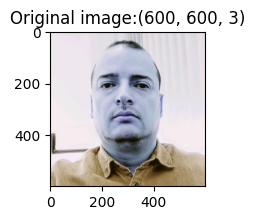

In [6]:
# Original photo
originalPhoto=cv2.imread(myFile)
plotImage(originalPhoto)

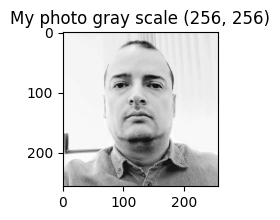

In [7]:
myPhoto=cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
myPhoto=cv2.resize(myPhoto,(256,256))
plotImageGray(myPhoto,1,1,'My photo gray scale ')

### 2.3 Calculate and plot the average face of the cohort.


I define a function to load images, then convert the results in a numpy array

In [8]:
def loadImages():
  images=[]
  for file in os.listdir(dataset_dir):
    file=dataset_dir + '/' + file
    try:
      photo=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
      photo=cv2.resize(photo,(256,256))
      images.append(photo)
    except Exception as e:
      print(file)
  return images

class_images=loadImages()
arr_class_images=np.array(class_images)
print(arr_class_images.shape[0],' Imagenes cargadas de calidad ',arr_class_images.shape[1:] )

../pictureFace/Carlos Andrés Sepúlveda Calle.jpeg
../pictureFace/Carolina Bareño.jpg
24  Imagenes cargadas de calidad  (256, 256)


Calculate the average with numpy.mean

In [9]:
classmatePhoto=np.average(arr_class_images,axis=0)

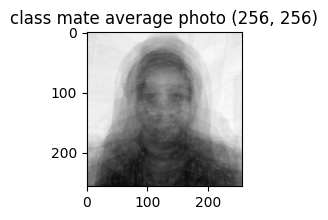

In [10]:
plotImageGray(classmatePhoto,2,2,'class mate average photo ')

### 2.4 How distant is your face from the average? How would you measure it?

To find the distance from my face and the average I will use numpy.linalg.norm to calculate the euclidian distance between 2 points




In [11]:
n1=np.linalg.norm(myPhoto.flatten(),ord=2)
n2=np.linalg.norm(classmatePhoto.flatten(),ord=2)
print("The distance of my photo respect the average is", round(n1-n2,2) )

The distance of my photo respect the average is 8557.55


### Save images to use in next points

In [12]:
SaveMyPhoto=dataset_dir + '/myPhotoGray.png'
cv2.imwrite(SaveMyPhoto,myPhoto)

True